In [5]:
%pylab inline
import os
import gc
import numpy as np
import catutil as utilities
import imgSimutil as imgUtil
import astropy.io.fits as pyfits
from astropy.table import Table,vstack,hstack

Populating the interactive namespace from numpy and matplotlib


In [1]:
cd wrkDir/FPFS2/sim2/

/lustre/work/xiangchong.li/work/FPFS2/sim2


In [66]:
pltDir='plot/cosmozBlending/'
if not os.path.isdir(pltDir):
    os.mkdir(pltDir)
    
def estimate_mArray(d2222,d0000,d2000,d0200,d0020,d0002):
    bz1o=(np.average(d2222['e1_z1'],weights=d2222['n_z1'])-np.average(d0000['e1_z1'],weights=d0000['n_z1']))/0.04
    bz2o=(np.average(d2222['e1_z2'],weights=d2222['n_z2'])-np.average(d0000['e1_z2'],weights=d0000['n_z2']))/0.04
    bz3o=(np.average(d2222['e1_z3'],weights=d2222['n_z3'])-np.average(d0000['e1_z3'],weights=d0000['n_z3']))/0.04
    bz4o=(np.average(d2222['e1_z4'],weights=d2222['n_z4'])-np.average(d0000['e1_z4'],weights=d0000['n_z4']))/0.04
    bz1n=(np.average(d2000['e1_z1'],weights=d2000['n_z1'])-np.average(d0000['e1_z1'],weights=d0000['n_z1']))/0.04
    bz2n=(np.average(d0200['e1_z2'],weights=d0200['n_z2'])-np.average(d0000['e1_z2'],weights=d0000['n_z2']))/0.04
    bz3n=(np.average(d0020['e1_z3'],weights=d0020['n_z3'])-np.average(d0000['e1_z3'],weights=d0000['n_z3']))/0.04
    bz4n=(np.average(d0002['e1_z4'],weights=d0002['n_z4'])-np.average(d0000['e1_z4'],weights=d0000['n_z4']))/0.04
    dmz1=bz1n/bz1o-1
    dmz2=bz2n/bz2o-1
    dmz3=bz3n/bz3o-1
    dmz4=bz4n/bz4o-1
    mArray=np.array([dmz1,dmz2,dmz3,dmz4])
    return mArray

def estimate_mArray2(d2222,d0000,d2000,d0200,d0020,d0002):
    bz1o=(np.average(d2222['e1_z1'],weights=d2222['n_z1'])-np.average(d0000['e1_z1'],weights=d0000['n_z1']))/0.04
    bz2o=(np.average(d2222['e1_z2'],weights=d2222['n_z2'])-np.average(d0000['e1_z2'],weights=d0000['n_z2']))/0.04
    bz3o=(np.average(d2222['e1_z3'],weights=d2222['n_z3'])-np.average(d0000['e1_z3'],weights=d0000['n_z3']))/0.04
    bz4o=(np.average(d2222['e1_z4'],weights=d2222['n_z4'])-np.average(d0000['e1_z4'],weights=d0000['n_z4']))/0.04
    bz1o=bz1o*np.sum(d0000['n_z1'])
    bz2o=bz2o*np.sum(d0000['n_z2'])
    bz3o=bz3o*np.sum(d0000['n_z3'])
    bz4o=bz4o*np.sum(d0000['n_z4'])
    
    bz1n=(np.dot(d2000['e1_z1'],d2000['n_z1'])-np.dot(d0000['e1_z1'],d0000['n_z1']))/0.04
    bz2n=(np.dot(d0200['e1_z2'],d0200['n_z2'])-np.dot(d0000['e1_z2'],d0000['n_z2']))/0.04
    bz3n=(np.dot(d0020['e1_z3'],d0020['n_z3'])-np.dot(d0000['e1_z3'],d0000['n_z3']))/0.04
    bz4n=(np.dot(d0002['e1_z4'],d0002['n_z4'])-np.dot(d0000['e1_z4'],d0000['n_z4']))/0.04
    dmz1=bz1n/bz1o-1
    dmz2=bz2n/bz2o-1
    dmz3=bz3n/bz3o-1
    dmz4=bz4n/bz4o-1
    mArray=np.array([dmz1,dmz2,dmz3,dmz4])
    return mArray

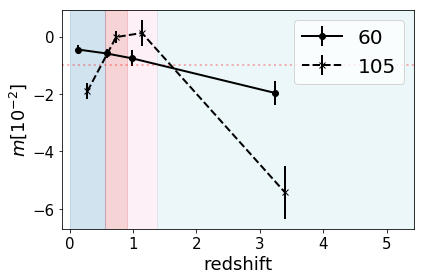

In [90]:
Dir='outCosmoR-var36em4/mag245-res03-bm38/'
lList=['60','105']
zbound  =   np.array([0.,0.561,0.906,1.374,5.410])
bAll=[]
errAll=[]
for psz in lList:
    err=[]
    fname=os.path.join(Dir,'e1_g1-2222_psf%s.fits' %psz)
    d2222=pyfits.getdata(fname)
    fname=os.path.join(Dir,'e1_g1-0000_psf%s.fits' %psz)
    d0000=pyfits.getdata(fname)
    fname=os.path.join(Dir,'e1_g1-2000_psf%s.fits' %psz)
    d2000=pyfits.getdata(fname)
    fname=os.path.join(Dir,'e1_g1-0200_psf%s.fits' %psz)
    d0200=pyfits.getdata(fname)
    fname=os.path.join(Dir,'e1_g1-0020_psf%s.fits' %psz)
    d0020=pyfits.getdata(fname)
    fname=os.path.join(Dir,'e1_g1-0002_psf%s.fits' %psz)
    d0002=pyfits.getdata(fname)
    mArray=estimate_mArray(d2222,d0000,d2000,d0200,d0020,d0002)
    bAll.append(mArray)
    ngroup=len(d0000)
    for ig in range(200):
        d2222c=np.delete(d2222,ig)
        d0000c=np.delete(d0000,ig)
        d2000c=np.delete(d2000,ig)
        d0200c=np.delete(d0200,ig)
        d0020c=np.delete(d0020,ig)
        d0002c=np.delete(d0002,ig)
        mArrayc=estimate_mArray(d2222c,d0000c,d2000c,d0200c,d0020c,d0002c)
        err.append(mArrayc-mArray)
        del d2222c,d0000c,d2000c,d0200c,d0020c,d0002c,mArrayc
        gc.collect()
    errAll.append(np.sqrt(np.sum(np.vstack(err)**2.,axis=0)))
    del err,mArray
    gc.collect()

lsList=['o-','x--','>:']
ishift=[-0.15,0,0.15]
for i in range(len(lList)):
    plt.errorbar((zbound[:-1]+zbound[1:])/2.+ishift[i],bAll[i]*100,errAll[i]*100,ls=lsList[i][1:],\
                 marker=lsList[i][0],label=lList[i],c='black')
cmap = cm.tab20
norm = Normalize(vmin=0, vmax=len(zbound)-2)
for iz in range(len(zbound)-1):
    cc=cmap(norm(iz))
    plt.axvspan(zbound[iz],zbound[iz+1],alpha=0.2, color=cc)
plt.plot(np.linspace(-0.12,5.43,20),-0.98*np.ones(20),c='red',ls=':',alpha=0.3)
plt.legend(loc='upper right')
plt.ylabel(r'$m [10^{-2}]$')
plt.xlabel('redshift')
plt.xlim(-0.12,5.43)
plt.tight_layout()
np.save(os.path.join(Dir,'bAll.npy'),bAll)
np.save(os.path.join(Dir,'errAll.npy'),errAll)
plt.savefig(os.path.join(pltDir,'%s-%s.png' %tuple(Dir.split('/')[:-1])))
plt.savefig(os.path.join(pltDir,'%s-%s.pdf' %tuple(Dir.split('/')[:-1])))

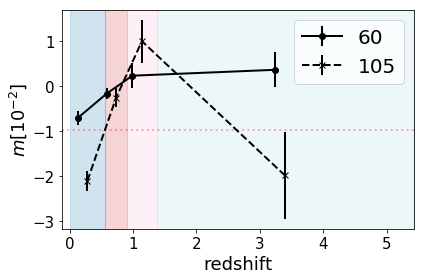

In [92]:
Dir='outCosmoE-var36em4/mag245-res03-bm38/'
lList=['60','105']
zbound  =   np.array([0.,0.561,0.906,1.374,5.410])
bAll=[]
errAll=[]
for psz in lList:
    err=[]
    fname=os.path.join(Dir,'e1_g1-2222_psf%s.fits' %psz)
    d2222=pyfits.getdata(fname)
    fname=os.path.join(Dir,'e1_g1-0000_psf%s.fits' %psz)
    d0000=pyfits.getdata(fname)
    fname=os.path.join(Dir,'e1_g1-2000_psf%s.fits' %psz)
    d2000=pyfits.getdata(fname)
    fname=os.path.join(Dir,'e1_g1-0200_psf%s.fits' %psz)
    d0200=pyfits.getdata(fname)
    fname=os.path.join(Dir,'e1_g1-0020_psf%s.fits' %psz)
    d0020=pyfits.getdata(fname)
    fname=os.path.join(Dir,'e1_g1-0002_psf%s.fits' %psz)
    d0002=pyfits.getdata(fname)
    mArray=estimate_mArray(d2222,d0000,d2000,d0200,d0020,d0002)
    bAll.append(mArray)
    ngroup=len(d0000)
    for ig in range(200):
        d2222c=np.delete(d2222,ig)
        d0000c=np.delete(d0000,ig)
        d2000c=np.delete(d2000,ig)
        d0200c=np.delete(d0200,ig)
        d0020c=np.delete(d0020,ig)
        d0002c=np.delete(d0002,ig)
        mArrayc=estimate_mArray(d2222c,d0000c,d2000c,d0200c,d0020c,d0002c)
        err.append(mArrayc-mArray)
        del d2222c,d0000c,d2000c,d0200c,d0020c,d0002c,mArrayc
        gc.collect()
    errAll.append(np.sqrt(np.sum(np.vstack(err)**2.,axis=0)))
    del err,mArray
    gc.collect()

lsList=['o-','x--','>:']
ishift=[-0.15,0,0.15]
for i in range(len(lList)):
    plt.errorbar((zbound[:-1]+zbound[1:])/2.+ishift[i],bAll[i]*100,errAll[i]*100,ls=lsList[i][1:],\
                 marker=lsList[i][0],label=lList[i],c='black')
cmap = cm.tab20
norm = Normalize(vmin=0, vmax=len(zbound)-2)
for iz in range(len(zbound)-1):
    cc=cmap(norm(iz))
    plt.axvspan(zbound[iz],zbound[iz+1],alpha=0.2, color=cc)
plt.plot(np.linspace(-0.12,5.43,20),-0.98*np.ones(20),c='red',ls=':',alpha=0.3)
plt.legend(loc='upper right')
plt.ylabel(r'$m [10^{-2}]$')
plt.xlabel('redshift')
plt.xlim(-0.12,5.43)
plt.tight_layout()
plt.savefig(os.path.join(Dir,'out.png'))
np.save(os.path.join(Dir,'bAll.npy'),bAll)
np.save(os.path.join(Dir,'errAll.npy'),errAll)
plt.savefig(os.path.join(pltDir,'%s-%s.png' %tuple(Dir.split('/')[:-1])))
plt.savefig(os.path.join(pltDir,'%s-%s.pdf' %tuple(Dir.split('/')[:-1])))